In [73]:
## import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline

In [2]:
# The below instruction will allow us to view all the columns of the dataset
pd.set_option("display.max_columns",None)

In [3]:
## Read csv file
data = pd.read_csv(r"E:\Data Science\Case Studies\Fradulent Insurance Claim\FradulentInsuranceClaim Data.csv")

In [4]:
## Look into the data by displaying first five rows of the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
## Check the dimensions of the dataset
data.shape

(1000, 40)

In [6]:
## Check the datatypes of all the attributes and number of non-null values of each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
## Check the number of unique values in each attribute
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [8]:
## Creating a new variable "bind_to_incident" which is the duration between "policy_bind_date" and "incident_date"
bind_to_incident = []
from datetime import datetime
for i in range(data.shape[0]):
    datestring1 = data["policy_bind_date"][i]
    dt1 = datetime.strptime(datestring1, '%d-%m-%Y')
    datestring2 = data["incident_date"][i]
    dt2 = datetime.strptime(datestring2, '%d-%m-%Y')
    bind_to_incident.append(((dt2.year - dt1.year)*365 + (dt2.month - dt1.month)*30 + (dt2.day - dt1.day))/30)

In [9]:
## Remove all id columns
data = data.drop(["policy_number","_c39","incident_location","insured_zip","auto_year","policy_bind_date","incident_date"], axis=1)
data.shape

(1000, 33)

In [10]:
## Add the "bind_to_incident" column to the dataset
data["bind_to_incident"] = bind_to_incident
data.shape

(1000, 34)

In [11]:
## Check summary statistics of all numerical variables
data.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,bind_to_incident
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,157.906567
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,89.486928
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,-0.666667
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,82.733333
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,155.950000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,235.525000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,305.500000


0.3621768477780205 -0.48542806739146993


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='months_as_customer'>

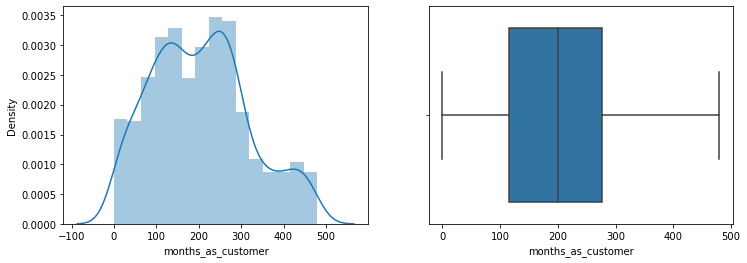

In [12]:
## Check the skewness, kurtosis and display the histogram, distribution plot and boxplot of variable "months_as_customer" 
print(data["months_as_customer"].skew(), data["months_as_customer"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["months_as_customer"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["months_as_customer"])

0.47898804709224163 -0.26025501504003934


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

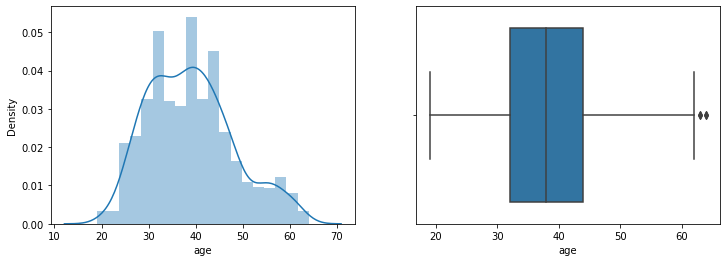

In [13]:
## Check the skewness, kurtosis and display the histogram, distribution plot and boxplot of variable "age"
print(data["age"].skew(), data["age"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["age"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["age"])

0.004401994526610823 0.0738894402077599


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy_annual_premium'>

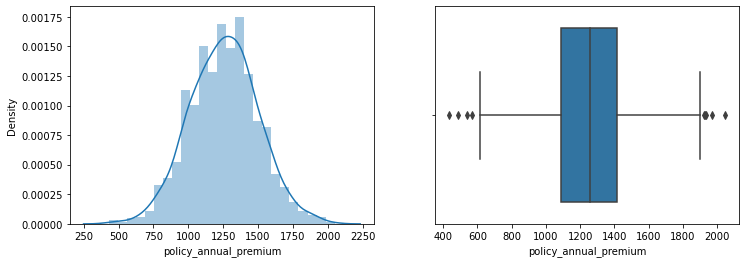

In [14]:
## Check the skewness, kurtosis and display the histogram, distribution plot and boxplot of variable "policy_annual_premium"
print(data["policy_annual_premium"].skew(), data["policy_annual_premium"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["policy_annual_premium"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["policy_annual_premium"])

0.4788502295807907 -1.276703510816485


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-gains'>

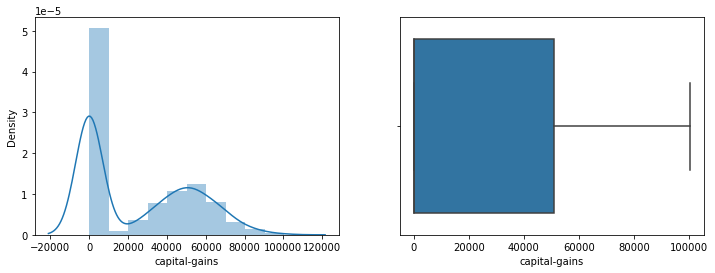

In [15]:
## Check the skewness, kurtosis and display the histogram, distribution plot and boxplot of variable "capital-gains"
print(data["capital-gains"].skew(), data["capital-gains"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["capital-gains"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["capital-gains"])

-0.39147194299389343 -1.3138745001493803


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-loss'>

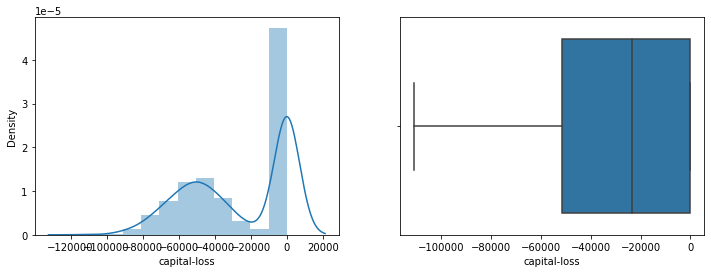

In [16]:
## Check the skewness, kurtosis and display the histogram, distribution plot and boxplot of variable "capital-loss"
print(data["capital-loss"].skew(), data["capital-loss"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["capital-loss"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["capital-loss"])

-0.594581988510234 -0.45408142669809326


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_claim_amount'>

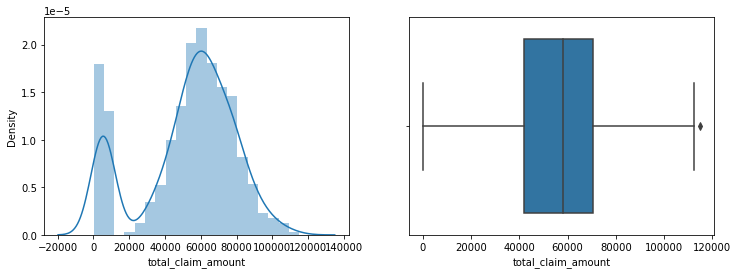

In [17]:
## Check the skewness, kurtosis and display the histogram, distribution plot and boxplot of variable "total_claim_amount"
print(data["total_claim_amount"].skew(), data["total_claim_amount"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["total_claim_amount"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["total_claim_amount"])

0.26481087847181833 -0.7630870610902973


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='injury_claim'>

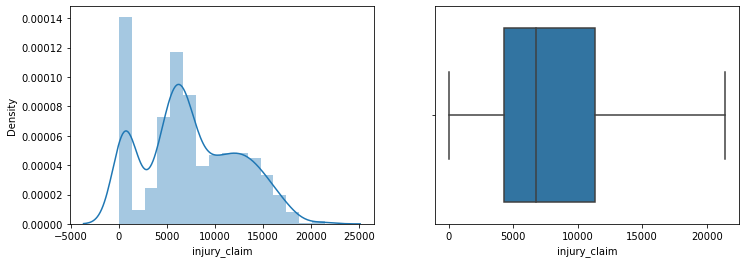

In [18]:
## Check the skewness, kurtosis and display the histogram, distribution plot and boxplot of variable "injury_claim"
print(data["injury_claim"].skew(), data["injury_claim"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["injury_claim"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["injury_claim"])

0.3781687764308289 -0.37638631173052817


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_claim'>

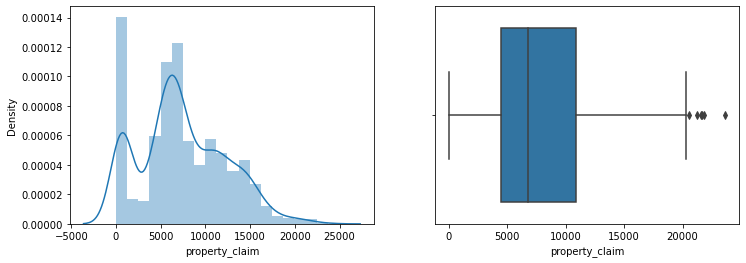

In [19]:
## Check the skewness, kurtosis and display the histogram, distribution plot and boxplot of variable "property_claim"
print(data["property_claim"].skew(), data["property_claim"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["property_claim"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["property_claim"])

-0.6210979312228687 -0.44657292312114905


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicle_claim'>

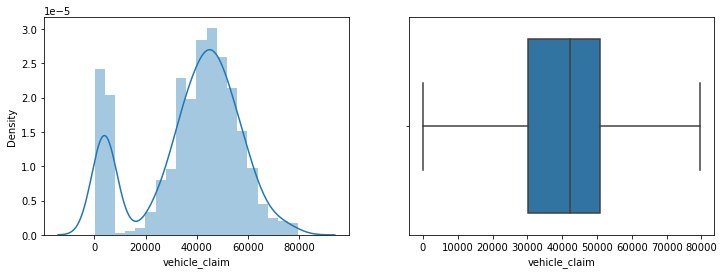

In [20]:
## Check the skewness, kurtosis and display the histogram, distribution plot and boxplot of variable "vehicle_claim"
print(data["vehicle_claim"].skew(), data["vehicle_claim"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["vehicle_claim"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["vehicle_claim"])

-0.05274303636140369 -1.20280745167096


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bind_to_incident'>

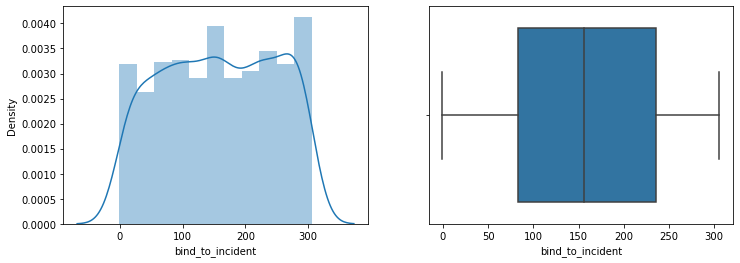

In [21]:
## Check the skewness, kurtosis and display the histogram, distribution plot and boxplot of variable "bind_to_incident"
print(data["bind_to_incident"].skew(), data["bind_to_incident"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["bind_to_incident"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["bind_to_incident"])

In [22]:
## See the correlation among all the numerical variables
data[["months_as_customer","age","policy_annual_premium","capital-gains","capital-loss","total_claim_amount","injury_claim",
    "property_claim","vehicle_claim","bind_to_incident"]].corr()

,months_as_customer,age,policy_annual_premium,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim,bind_to_incident
months_as_customer,1.000000,0.922098,0.005018,0.006399,0.020209,0.062108,0.065329,0.034940,0.061013,0.047937
age,0.922098,1.000000,0.014404,-0.007075,0.007368,0.069863,0.075522,0.060898,0.062588,0.036753
policy_annual_premium,0.005018,0.014404,1.000000,-0.013738,0.023547,0.009094,-0.017633,-0.011654,0.020246,-0.001205
capital-gains,0.006399,-0.007075,-0.013738,1.000000,-0.046904,0.015980,0.025934,-0.000779,0.015836,-0.042206
capital-loss,0.020209,0.007368,0.023547,-0.046904,1.000000,-0.036060,-0.046060,-0.022863,-0.032665,0.027628
total_claim_amount,0.062108,0.069863,0.009094,0.015980,-0.036060,1.000000,0.805025,0.810686,0.982773,-0.000765
injury_claim,0.065329,0.075522,-0.017633,0.025934,-0.046060,0.805025,1.000000,0.563866,0.722878,-0.002476
property_claim,0.034940,0.060898,-0.011654,-0.000779,-0.022863,0.810686,0.563866,1.000000,0.732090,-0.000447
vehicle_claim,0.061013,0.062588,0.020246,0.015836,-0.032665,0.982773,0.722878,0.732090,1.000000,-0.000315
bind_to_incident,0.047937,0.036753,-0.001205,-0.042206,0.027628,-0.000765,-0.002476,-0.000447,-0.000315,1.000000


In [23]:
## Shortlist the numerical features which are not highly correlated
num_features = ["age","policy_annual_premium","capital-gains","capital-loss","total_claim_amount","injury_claim",
    "property_claim","bind_to_incident"]

In [24]:
## Shift the target variable to last column
data["Fraud_Reported"] = data["fraud_reported"]
data = data.drop("fraud_reported", axis=1)
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,bind_to_incident,Fraud_Reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,3.433333,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,104.300000,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,176.033333,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,299.666667,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,8.533333,N


In [25]:
## See all the available attributes
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'bind_to_incident', 'Fraud_Reported'],
      dtype='object')

In [26]:
## Check the varaibles with null values
for col in data.columns:
    count = 0
    for i in range(len(col)):
        if data[col][i] == "?":
            count = count+1
    if count>0:
        print(col)

collision_type
property_damage
police_report_available


In [27]:
## Replace "?" with NaN, so that data imputation will be easier
data["collision_type"] = np.where(data["collision_type"] == "?",np.NaN,data["collision_type"])
data["property_damage"] = np.where(data["property_damage"] == "?",np.NaN,data["property_damage"])
data["police_report_available"] = np.where(data["police_report_available"] == "?",np.NaN,data["police_report_available"])

In [28]:
## Check the number of null values and % of null values in each attribute
for col in data.columns:
    n_miss = data[col].isnull().sum()
    perc = n_miss / data.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (col, n_miss, perc)) 

> months_as_customer, Missing: 0 (0.0%)
> age, Missing: 0 (0.0%)
> policy_state, Missing: 0 (0.0%)
> policy_csl, Missing: 0 (0.0%)
> policy_deductable, Missing: 0 (0.0%)
> policy_annual_premium, Missing: 0 (0.0%)
> umbrella_limit, Missing: 0 (0.0%)
> insured_sex, Missing: 0 (0.0%)
> insured_education_level, Missing: 0 (0.0%)
> insured_occupation, Missing: 0 (0.0%)
> insured_hobbies, Missing: 0 (0.0%)
> insured_relationship, Missing: 0 (0.0%)
> capital-gains, Missing: 0 (0.0%)
> capital-loss, Missing: 0 (0.0%)
> incident_type, Missing: 0 (0.0%)
> collision_type, Missing: 178 (17.8%)
> incident_severity, Missing: 0 (0.0%)
> authorities_contacted, Missing: 0 (0.0%)
> incident_state, Missing: 0 (0.0%)
> incident_city, Missing: 0 (0.0%)
> incident_hour_of_the_day, Missing: 0 (0.0%)
> number_of_vehicles_involved, Missing: 0 (0.0%)
> property_damage, Missing: 360 (36.0%)
> bodily_injuries, Missing: 0 (0.0%)
> witnesses, Missing: 0 (0.0%)
> police_report_available, Missing: 343 (34.3%)
> total

In [29]:
## Display all the unique values in the variable "collision_type"
data["collision_type"].unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [30]:
## Check the number of null values in the variable "collision_type"
data["collision_type"].isnull().sum()

178

In [31]:
## Before data imputation, map the categorical variables to numerical values
data["collision_type"] = data["collision_type"].map({'Side Collision':0,'Rear Collision':1,'Front Collision':2})

In [32]:
## Data imputation of missing values with mode
data["collision_type"] = data["collision_type"].fillna(data["collision_type"].mode()[0])
data["collision_type"].isnull().sum()

0

In [33]:
## Display all the unique values in the variable "property_damage"
data["property_damage"].unique()

array(['YES', nan, 'NO'], dtype=object)

In [34]:
## Check the number of null values in the variable "property_damage"
data["property_damage"].isnull().sum()

360

In [35]:
## Before data imputation, map the categorical variables to numerical values
data["property_damage"] = data["property_damage"].map({"YES":1,"NO":0})

In [36]:
## Data imputation of missing values with mode
data["property_damage"] = data["property_damage"].fillna(data["property_damage"].mode()[0])
data["property_damage"].isnull().sum()

0

In [37]:
## Display all the unique values in the variable ""police_report_available""
data["police_report_available"].unique()

array(['YES', nan, 'NO'], dtype=object)

In [38]:
## Check the number of null values in the variable ""police_report_available""
data["police_report_available"].isnull().sum()

343

In [39]:
## Before data imputation, map the categorical variables to numerical values
data["police_report_available"] = data["police_report_available"].map({"YES":1,"NO":0})

In [40]:
## Data imputation of missing values with mode
data["police_report_available"] = data["police_report_available"].fillna(data["police_report_available"].mode()[0])
data["police_report_available"].isnull().sum()

0

In [41]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,bind_to_incident,Fraud_Reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,0.0,Major Damage,Police,SC,Columbus,5,1,1.0,1,2,1.0,71610,6510,13020,52080,Saab,92x,3.433333,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,1.0,Minor Damage,Police,VA,Riverwood,8,1,0.0,0,0,0.0,5070,780,780,3510,Mercedes,E400,104.300000,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,1.0,Minor Damage,Police,NY,Columbus,7,3,0.0,2,3,0.0,34650,7700,3850,23100,Dodge,RAM,176.033333,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,2.0,Major Damage,Police,OH,Arlington,5,1,0.0,1,2,0.0,63400,6340,6340,50720,Chevrolet,Tahoe,299.666667,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,1.0,Minor Damage,None,NY,Arlington,20,1,0.0,0,1,0.0,6500,1300,650,4550,Accura,RSX,8.533333,N


In [42]:
## Seperate the categorical features that are to be encoded
features_tobe_encoded = ["policy_state","policy_csl","policy_deductable","umbrella_limit","insured_sex","insured_education_level",
                         "insured_occupation","insured_hobbies","insured_relationship","incident_type",
                         "incident_severity","authorities_contacted","incident_state","incident_city","incident_hour_of_the_day",
                         "number_of_vehicles_involved","bodily_injuries","witnesses","auto_make","auto_model"]

In [43]:
## Encoding Categorical features using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
data[features_tobe_encoded] = data[features_tobe_encoded].astype(str)
ordinal_encoder = OrdinalEncoder()
data[features_tobe_encoded] = ordinal_encoder.fit_transform(data[features_tobe_encoded])

In [44]:
## Encoding the target feature
data["Fraud_Reported"] = np.where(data["Fraud_Reported"] == "Y",1,0)
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,bind_to_incident,Fraud_Reported
0,328,48,2.0,1.0,0.0,1406.91,1.0,1.0,4.0,2.0,17.0,0.0,53300,0,2.0,0.0,0.0,4.0,4.0,1.0,19.0,0.0,1.0,1.0,2.0,1.0,71610,6510,13020,52080,10.0,1.0,3.433333,1
1,228,42,1.0,1.0,1.0,1197.22,6.0,1.0,4.0,6.0,15.0,2.0,0,0,3.0,1.0,1.0,4.0,5.0,5.0,22.0,0.0,0.0,0.0,0.0,0.0,5070,780,780,3510,8.0,12.0,104.300000,1
2,134,29,2.0,0.0,1.0,1413.14,6.0,0.0,6.0,11.0,2.0,3.0,35100,0,0.0,1.0,1.0,4.0,1.0,1.0,21.0,2.0,0.0,2.0,3.0,0.0,34650,7700,3850,23100,4.0,30.0,176.033333,0
3,256,41,0.0,1.0,1.0,1415.74,7.0,0.0,6.0,1.0,2.0,4.0,48900,-62400,2.0,2.0,0.0,4.0,2.0,0.0,19.0,0.0,0.0,1.0,2.0,0.0,63400,6340,6340,50720,3.0,34.0,299.666667,1
4,228,44,0.0,2.0,0.0,1583.91,7.0,1.0,0.0,11.0,2.0,4.0,66000,-46000,3.0,1.0,1.0,2.0,1.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,6500,1300,650,4550,0.0,31.0,8.533333,0


In [45]:
## List all the categorical features
cate_features = features_tobe_encoded
cate_features.append("collision_type")
cate_features.append("property_damage") 
cate_features.append("police_report_available")
cate_features.append("Fraud_Reported")
print(cate_features)

['policy_state', 'policy_csl', 'policy_deductable', 'umbrella_limit', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'auto_make', 'auto_model', 'collision_type', 'property_damage', 'police_report_available', 'Fraud_Reported']


In [46]:
## Seperate the input categorical features and target variable to conduct chi2 test
X_cate=data[cate_features].values[:,:-1]
y_cate=data[cate_features].values[:,-1]

In [47]:
## Import the required libraries to conduct chi2 test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [48]:
# Function for conducting chi2 test of each categorical feature with target variable
def select_features(X_cate, y_cate):
    fs = SelectKBest(score_func=chi2, k=10)
    fs.fit(X_cate, y_cate)
    X_cate_fs = fs.transform(X_cate)
    return X_cate_fs, fs

In [49]:
X_cate_fs, fs = select_features(X_cate, y_cate)

Feature 3: 7.387715 (0.006567)
Feature 7: 7.250932 (0.007086)
Feature 10: 122.804296 (0.000000)
Feature 14: 20.361605 (0.000006)


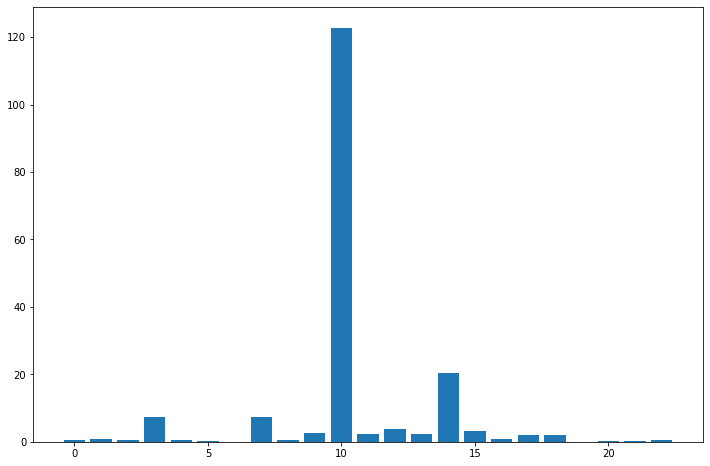

In [58]:
## Choosing the features with high chi2 value and p value less than 0.05
for i in range(len(fs.scores_)):
    if ((fs.scores_[i]>0) & (fs.pvalues_[i]<0.05)):
        print('Feature %d: %f (%f)' % (i, fs.scores_[i], fs.pvalues_[i]))
    
# plot the scores
plt.figure(figsize=(12,8))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [59]:
## List the above selected 4 features
selected_cate = ['umbrella_limit', 'insured_hobbies',  'incident_severity',  'incident_hour_of_the_day']

In [60]:
## Concatenate the numerical and categorical features
final_df= pd.concat([data[num_features], data[selected_cate]], axis=1)
final_df.shape

(1000, 12)

In [61]:
## seperate the data to train and validate the models
array = data.values
X = array[:,:-1]
y = array[:,-1]
validation_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=validation_size, random_state=seed)

In [65]:
num_folds = 10
seed = 7

In [78]:
## Generate the pipelines to automate the process of scaling of the data and applying machine learning algorithm 
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
scores = ["accuracy","roc_auc","precision","recall","f1_micro"]
for score in scores:
    print(score)
    for name, model in pipelines:
        kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=score)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

accuracy
ScaledLR: 0.780000 (0.055396)
ScaledLDA: 0.781250 (0.060013)
ScaledKNN: 0.735000 (0.060673)
ScaledCART: 0.770000 (0.025125)
ScaledNB: 0.708750 (0.055916)
ScaledSVM: 0.756250 (0.047516)
roc_auc
ScaledLR: 0.751576 (0.084693)
ScaledLDA: 0.749548 (0.085289)
ScaledKNN: 0.582181 (0.076194)
ScaledCART: 0.684938 (0.043740)
ScaledNB: 0.717048 (0.062346)
ScaledSVM: 0.717799 (0.082011)
precision
ScaledLR: 0.589583 (0.070158)
ScaledLDA: 0.599235 (0.084532)
ScaledKNN: 0.389462 (0.212009)
ScaledCART: 0.524689 (0.070456)
ScaledNB: 0.431714 (0.051892)


C:\Users\badboy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\badboy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ScaledSVM: 0.478333 (0.342868)
recall
ScaledLR: 0.346298 (0.116195)
ScaledLDA: 0.341527 (0.120490)
ScaledKNN: 0.134453 (0.083356)
ScaledCART: 0.549650 (0.106005)
ScaledNB: 0.589660 (0.110073)
ScaledSVM: 0.054278 (0.033956)
f1_micro
ScaledLR: 0.780000 (0.055396)
ScaledLDA: 0.781250 (0.060013)
ScaledKNN: 0.735000 (0.060673)
ScaledCART: 0.766250 (0.041098)
ScaledNB: 0.708750 (0.055916)
ScaledSVM: 0.756250 (0.047516)


In [81]:
## As Logistic Regression gave more roc_auc score, selecting this algorithm for final modelling
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LogisticRegression()
model.fit(rescaledX, y_train)
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print("Accuracy: %.3f" %accuracy_score(y_test, predictions))
print("ROC_AUC: %.3f" %roc_auc_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.765
ROC_AUC: 0.623
[[136  13]
 [ 34  17]]
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       149
         1.0       0.57      0.33      0.42        51

    accuracy                           0.77       200
   macro avg       0.68      0.62      0.64       200
weighted avg       0.74      0.77      0.74       200

